In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scipy

In [9]:
def psi_gen(alpha):
    m = 1.0
    omega = 1.0
    hbar = 1.0
    lambda_ = np.sqrt(m * omega / hbar)
    
    def psi(x):
        res = np.sqrt(lambda_ / np.sqrt(np.pi))
        res *= np.exp(-0.5 * (np.conj(alpha) * alpha))
        res *= np.exp(-0.5 * ((lambda_ ** 2) * (x ** 2)))
        A = alpha / np.sqrt(2)
        B = lambda_ * x
        res = res * np.exp(2 * A * B - A * A)
        return res * np.conj(res)

    def psi_t(x, t):
        res = np.sqrt(lambda_ / np.sqrt(np.pi))
        res *= np.exp(-0.5 * (np.conj(alpha) * alpha))
        res *= np.exp(-0.5 * ((lambda_ ** 2) * (x ** 2)))
        A = np.exp(-1j * omega * t) * alpha / np.sqrt(2)
        B = lambda_ * x
        res = res * np.exp(2 * A * B - A * A)
        return res * np.conj(res)
    return psi, psi_t

/home/santana/MyStuff/QuantumJourney/quantum_venv/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/santana/MyStuff/QuantumJourney/quantum_venv/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


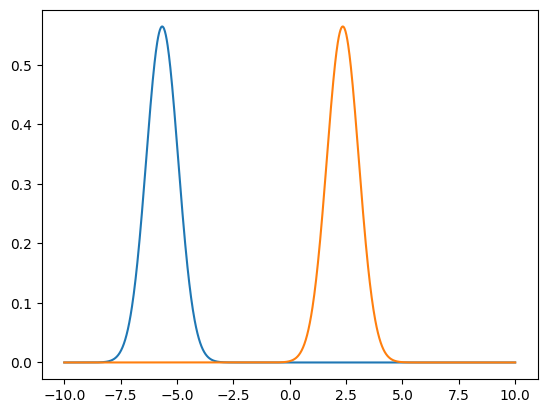

In [10]:
psi_func, psi_t_func = psi_gen(-4)

t = 4

x = np.linspace(-10, 10, 1000)
plt.plot(x, psi_func(x))
plt.plot(x, psi_t_func(x, 2))


In [11]:
max_lim = 10

def cat(alpha):
    res = np.zeros(max_lim)

    multiplier = np.exp(-0.5 * alpha * np.conj(alpha)) / np.sqrt(2)

    for i in range(max_lim):
        res[i] += (alpha ** i) / np.sqrt(scipy.special.factorial(i))
        res[i] += ((-1.0 * alpha) ** i) / np.sqrt(scipy.special.factorial(i))

    res *= multiplier

    return res ** 2


0.9883467613673133


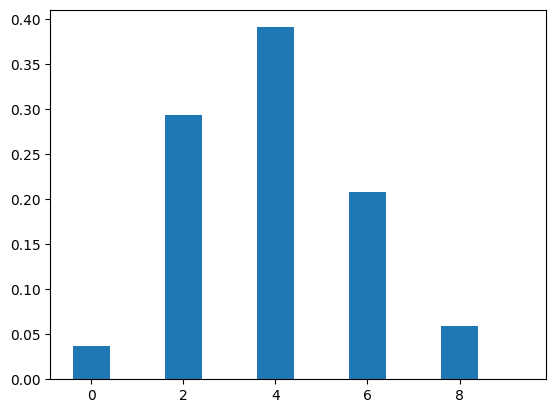

In [12]:
x = np.arange(0, max_lim, 1)
y = cat(2)

plt.bar(x, y)
print(np.sum(y))

In [2]:
temp = np.zeros((4, 4))

temp[0][0] = 2
temp[0][3] = 3
temp[3][0] = 1
temp[3][3] = 4

print(np.linalg.eig(temp))

EigResult(eigenvalues=array([1., 5., 0., 0.]), eigenvectors=array([[-0.9486833 , -0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.31622777, -0.70710678,  0.        ,  0.        ]]))


In [3]:
temp = np.zeros((4, 4))

temp[1][1] = 2
temp[1][2] = 3
temp[2][1] = 1
temp[2][2] = 4

print(np.linalg.eig(temp))

EigResult(eigenvalues=array([5., 1., 0., 0.]), eigenvectors=array([[ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.70710678,  0.9486833 ,  0.        ,  0.        ],
       [ 0.70710678, -0.31622777,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]))


In [ ]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit.quantum_info import Operator

import matplotlib.pyplot as plt

import numpy as np


In [ ]:
# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
visualize_result(counts)
qc.draw(output='mpl')

In [ ]:
# circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

qc.h([0, 1])



qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# execution
simulator = Estimator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
#visualize_result(counts)
qc.draw(output='mpl')

[ 4.89858720e-16  2.50642345e-01  4.82285192e-01  6.77608385e-01
  8.22490626e-01  9.07225040e-01  9.27316407e-01  8.83786704e-01
  7.82963602e-01  6.35776999e-01  4.56636443e-01  2.62002630e-01
  6.87952941e-02 -1.07205434e-01 -2.52807818e-01 -3.58567391e-01
 -4.19545908e-01 -4.35601254e-01 -4.11186687e-01 -3.54687254e-01
 -2.77367533e-01 -1.92043559e-01 -1.11618897e-01 -4.76376944e-02
 -9.00493678e-03 -1.00628162e-03 -2.47286371e-02 -7.69412105e-02
 -1.50449280e-01 -2.34884239e-01 -3.17848430e-01 -3.86296496e-01
 -4.28010122e-01 -4.33012702e-01 -3.94775601e-01 -3.11088004e-01
 -1.84495589e-01 -2.22563486e-02  1.64189608e-01  3.60190375e-01
  5.49202011e-01  7.14331126e-01  8.39950227e-01  9.13227091e-01
  9.25416578e-01  8.72785508e-01  7.57076380e-01  5.85460347e-01
  3.69979539e-01  1.26528720e-01 -1.26528720e-01 -3.69979539e-01
 -5.85460347e-01 -7.57076380e-01 -8.72785508e-01 -9.25416578e-01
 -9.13227091e-01 -8.39950227e-01 -7.14331126e-01 -5.49202011e-01
 -3.60190375e-01 -1.64189

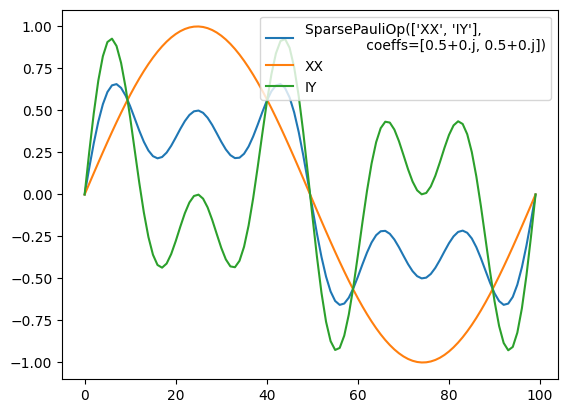

In [5]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Pauli, SparsePauliOp
 
import matplotlib.pyplot as plt
import numpy as np
 
# Define a circuit with two parameters.
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(0, 1)
circuit.h(0)
 
# Define a sweep over parameter values, where the second axis is over
# the two parameters in the circuit.
params = np.vstack([
    np.linspace(-np.pi, np.pi, 100),
    np.linspace(-4 * np.pi, 4 * np.pi, 100)
]).T
 
# Define three observables. Many formats are supported here including
# classes such as qiskit.quantum_info.SparsePauliOp. The inner length-1
# lists cause this array of observables to have shape (3, 1), rather
# than shape (3,) if they were omitted.
observables = [
    [SparsePauliOp(["XX", "IY"], [0.5, 0.5])],
    [Pauli("XX")],
    [Pauli("IY")]
]
 
# Instantiate a new statevector simulation based estimator object.
estimator = StatevectorEstimator()
 
# Estimate the expectation value for all 300 combinations of
# observables and parameter values, where the pub result will have
# shape (3, 100). This shape is due to our array of parameter
# bindings having shape (100,), combined with our array of observables
# having shape (3, 1)
pub = (circuit, observables, params)
job = estimator.run([pub])
 
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]
 
# Error-bar information is also available, but the error is 0
# for this StatevectorEstimator.
result.data.stds
 
# Pull out the array-based expectation value estimate data from the
# result and plot a trace for each observable.
for idx, pauli in enumerate(observables):
    plt.plot(result.data.evs[idx], label=pauli)
plt.legend()

circuit.draw(output='mpl')

print(result.data.evs[idx])